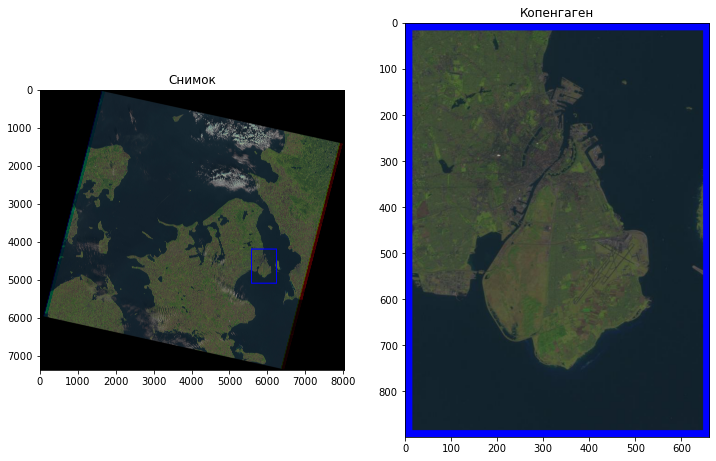

In [1]:
import matplotlib.pyplot as plt#для вывода изображений
import numpy as np#для работы с матрицами
import cv2#для отрисовки линий

def parse_txt(path):#фукнция для парсинга
    angles = ['CORNER_UL_LAT_PRODUCT', 'CORNER_UL_LON_PRODUCT', 'CORNER_UR_LAT_PRODUCT', 'CORNER_UR_LON_PRODUCT',
              'CORNER_LL_LAT_PRODUCT', 'CORNER_LL_LON_PRODUCT', 'CORNER_LR_LAT_PRODUCT', 'CORNER_LR_LON_PRODUCT']
    angles_dict = dict()
    f = open(path, 'r')
    for line in f:
        string = line.replace(' ','').replace('\n', '').split('=')
        if string[0] in angles:
            angles_dict[string[0]] = float(string[1])
    f.close()
    return angles_dict

image = plt.imread('LE07_L1TP_195021_20000929_20170209_01_T1.jpg')#читаем изображение
angles_dict = parse_txt('LE07_L1TP_195021_20000929_20170209_01_T1_MTL.txt')#получаем углы крайних точек
points = [(55.808994, 12.475016), (55.808994, 12.79201), 
          (55.567171, 12.475016), (55.567171, 12.79201)]#точки города
delta_x = abs((angles_dict['CORNER_UL_LON_PRODUCT']+angles_dict['CORNER_LL_LON_PRODUCT'])/2\
              - (angles_dict['CORNER_UR_LON_PRODUCT']+angles_dict['CORNER_LR_LON_PRODUCT'])/2)
delta_y = abs((angles_dict['CORNER_UL_LAT_PRODUCT']+angles_dict['CORNER_UR_LAT_PRODUCT'])/2\
              - (angles_dict['CORNER_LL_LAT_PRODUCT']+angles_dict['CORNER_LR_LAT_PRODUCT'])/2)
coeff_x = delta_x/image.shape[1]
coeff_y = delta_y/image.shape[0]

points_p = list()
for point in points:#преобразуем координаты в градусах в координаты на снимке
    x = abs(point[1]-angles_dict['CORNER_UL_LON_PRODUCT'])/coeff_x
    y = abs(point[0]-angles_dict['CORNER_UL_LAT_PRODUCT'])/coeff_y
    points_p.append((int(x),int(y)))
x_s, y_s = points_p[0]#начальная точка
delta_x_p = abs(points_p[0][0] - points_p[1][0])#ширина прямоугольника
delta_y_p = abs(points_p[0][1] - points_p[2][1])#высота прямоугольника
city_image = image[y_s:y_s+delta_y_p, x_s:x_s+delta_x_p]#вырезаем город
rectangle_lines = [
    [(x_s,y_s), (x_s, y_s+delta_y_p)], [(x_s,y_s), (x_s+delta_x_p, y_s)],
    [(x_s+delta_x_p, y_s), (x_s+delta_x_p, y_s+delta_y_p)], [(x_s, y_s+delta_y_p), (x_s+delta_x_p, y_s+delta_y_p)]
    ]#задаем точки прямоугольника для его выделения на снимке
for line in rectangle_lines:   
    result = cv2.line(image, line[0], line[1], color=(0, 0, 255), thickness=30)#рисуем линии
fig, axes = plt.subplots(1,2, figsize=(12, 10))#создаем холст для 2 изображений
axes[0].imshow(result)#выводим изображение снимка с выделенным городом
axes[0].set_title('Снимок')
axes[1].imshow(city_image)#выводим отдельно сам город
axes[1].set_title('Копенгаген')
plt.show()